In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF 
import numpy as np
from sklearn.metrics import mean_absolute_error

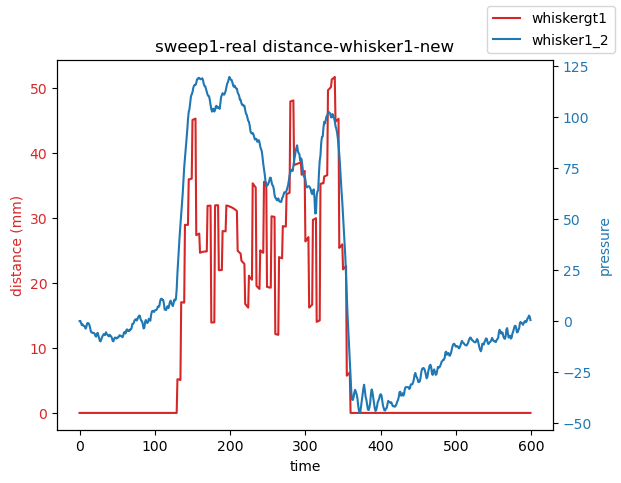

In [14]:
data = pd.read_csv('data1_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker1-new")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker1-new")
plt.show()

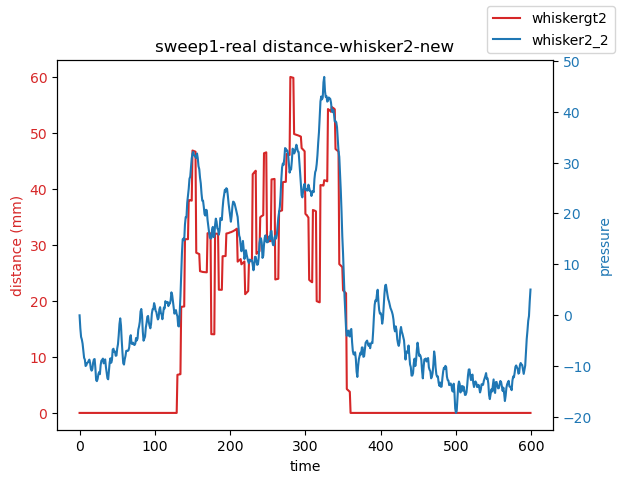

In [6]:
data = pd.read_csv('data1_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker2-new")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker2-new")
plt.show()

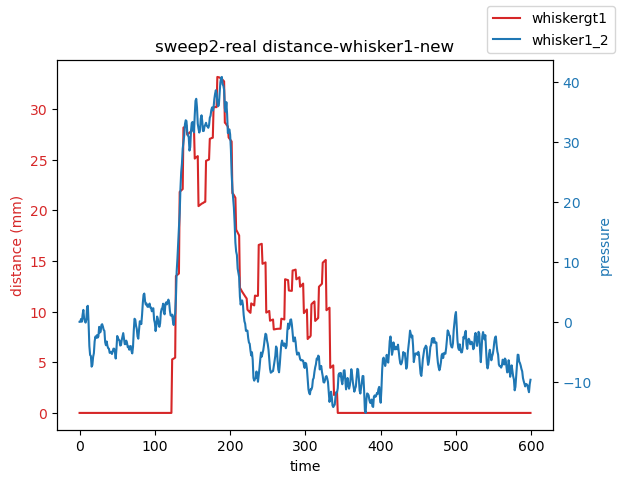

In [7]:
data = pd.read_csv('data2_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep2-real distance-whisker1-new")
fig.legend(loc="upper right")
plt.savefig("sweep2-real distance-whisker1-new")
plt.show()

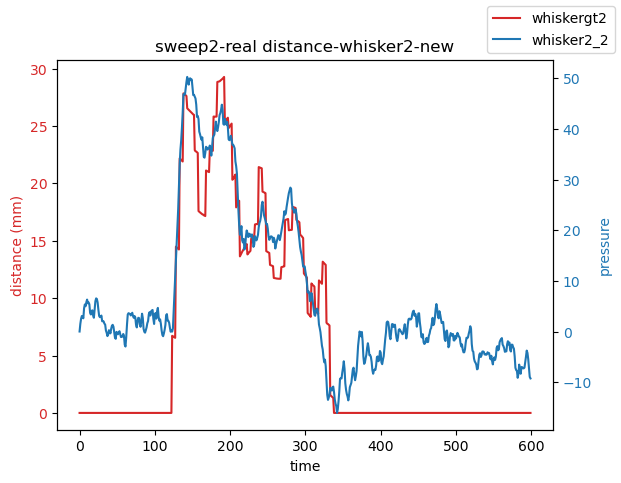

In [8]:
data = pd.read_csv('data2_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep2-real distance-whisker2-new")
fig.legend(loc="upper right")
plt.savefig("sweep2-real distance-whisker2-new")
plt.show()

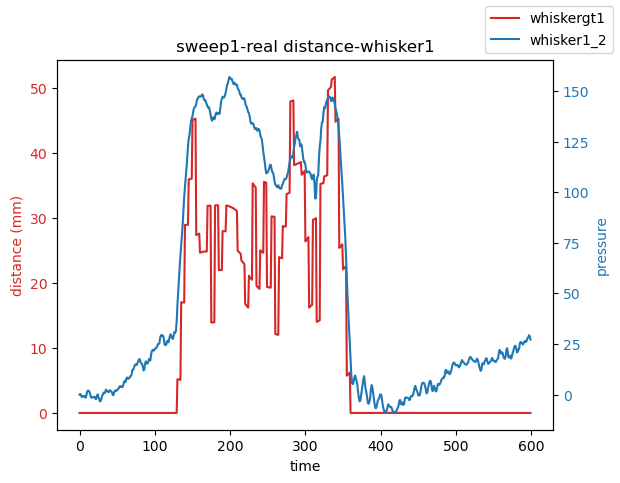

In [22]:
data = pd.read_csv('data3.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker1")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker1")
plt.show()

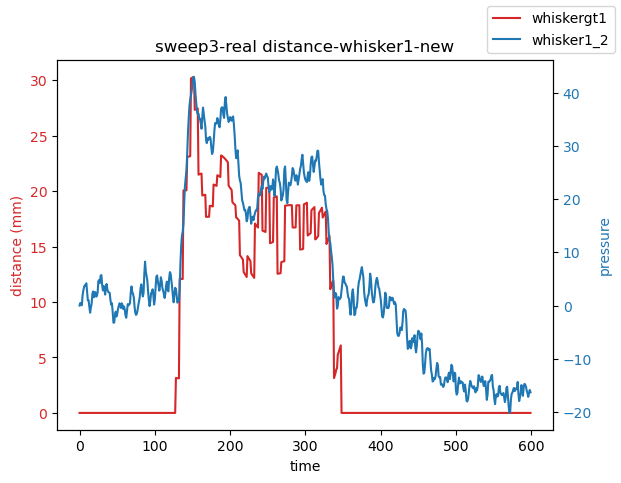

In [16]:
data = pd.read_csv('data3_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt1, color=color, label='whiskergt1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker1_2, color=color, label="whisker1_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep3-real distance-whisker1-new")
fig.legend(loc="upper right")
plt.savefig("sweep3-real distance-whisker1-new")
plt.show()

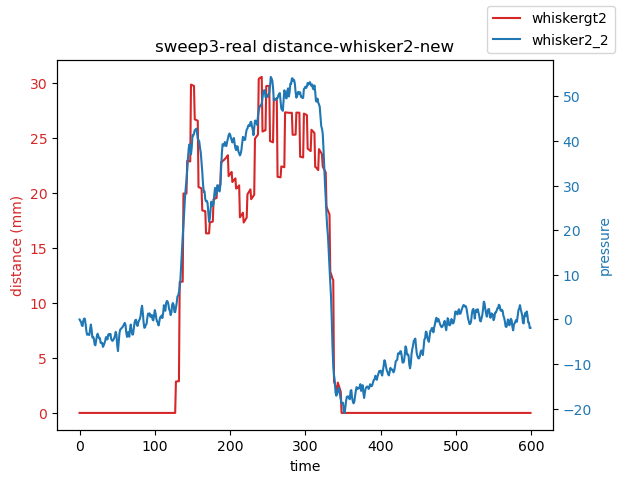

In [17]:
data = pd.read_csv('data3_new.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep3-real distance-whisker2-new")
fig.legend(loc="upper right")
plt.savefig("sweep3-real distance-whisker2-new")
plt.show()

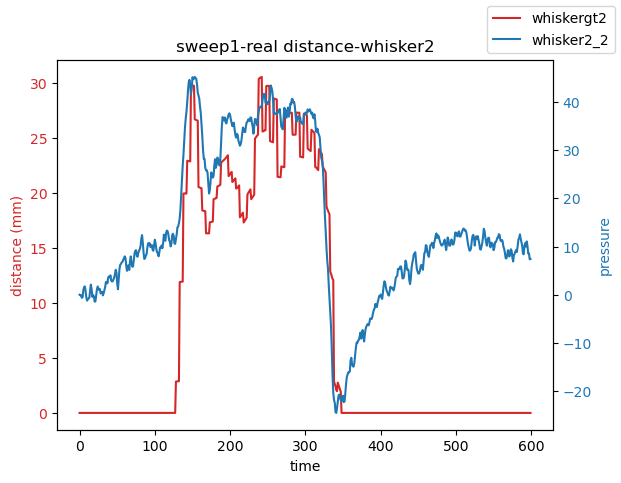

In [183]:
data = pd.read_csv('data3.csv')
whisker1_1=data.iloc[:,0].values
whisker1_2=data.iloc[:,1].values
whisker1_3=data.iloc[:,2].values
whisker2_1=data.iloc[:,3].values
whisker2_2=data.iloc[:,4].values
whisker2_3=data.iloc[:,5].values
whiskergt1=data.iloc[:,6].values
whiskergt2=data.iloc[:,7].values
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)', color=color)
ax1.plot(whiskergt2, color=color, label='whiskergt2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('pressure', color=color)  
ax2.plot(whisker2_2, color=color, label="whisker2_2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("sweep1-real distance-whisker2")
fig.legend(loc="upper right")
plt.savefig("sweep1-real distance-whisker2")
plt.show()

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 读取第一个数据集
data1 = pd.read_csv('data2_new.csv')
whisker1_2_data1 = data1.iloc[:, 1].values
whisker2_2_data1 = data1.iloc[:, 4].values
whiskergt1_data1 = data1.iloc[:, 6].values
whiskergt2_data1 = data1.iloc[:, 7].values

# 读取第二个数据集
data2 = pd.read_csv('data3_new.csv')
whisker1_2_data2 = data2.iloc[:, 1].values
whisker2_2_data2 = data2.iloc[:, 4].values
whiskergt1_data2 = data2.iloc[:, 6].values
whiskergt2_data2 = data2.iloc[:, 7].values

# 合并数据集
whisker1_2 = np.concatenate((whisker1_2_data1, whisker1_2_data2))
whisker2_2 = np.concatenate((whisker2_2_data1, whisker2_2_data2))
whiskergt1 = np.concatenate((whiskergt1_data1, whiskergt1_data2))
whiskergt2 = np.concatenate((whiskergt2_data1, whiskergt2_data2))

# 划分训练集和测试集
train_whisker1, test_whisker1, train_whisker2, test_whisker2, train_whiskergt1, test_whiskergt1, train_whiskergt2, test_whiskergt2 = train_test_split(whisker1_2, whisker2_2, whiskergt1, whiskergt2, test_size=0.25, shuffle=True)

filter_indices_train = train_whisker1 >= 10
filter_indices_test = test_whisker1 >= 10

# 将符合条件的数据索引对应位置上的whisker和whiskergt数据保留
train_whisker1_filtered = train_whisker1[filter_indices_train]
train_whisker2_filtered = train_whisker2[filter_indices_train]
train_whiskergt1_filtered = train_whiskergt1[filter_indices_train]
train_whiskergt2_filtered = train_whiskergt2[filter_indices_train]

test_whisker1_filtered = test_whisker1[filter_indices_test]
test_whisker2_filtered = test_whisker2[filter_indices_test]
test_whiskergt1_filtered = test_whiskergt1[filter_indices_test]
test_whiskergt2_filtered = test_whiskergt2[filter_indices_test]


train_whisker1_filtered1=train_whisker1_filtered.reshape(-1,1)
train_whisker2_filtered1=train_whisker2_filtered.reshape(-1,1)
test_whisker1_filtered1=test_whisker1_filtered.reshape(-1,1)
test_whisker2_filtered1=test_whisker2_filtered.reshape(-1,1)

train_gradient1 = np.gradient(train_whisker1_filtered, axis=0)
train_gradient2 = np.gradient(train_whisker2_filtered, axis=0)
test_gradient1 = np.gradient(test_whisker1_filtered, axis=0)
test_gradient2 = np.gradient(test_whisker2_filtered, axis=0)

# # 合并训练数据和梯度
train_whisker1_filtered2 = np.column_stack((train_whisker1_filtered, train_gradient1))
train_whisker2_filtered2 = np.column_stack((train_whisker2_filtered, train_gradient2))
test_whisker1_filtered2 = np.column_stack((test_whisker1_filtered, test_gradient1))
test_whisker2_filtered2 = np.column_stack((test_whisker2_filtered, test_gradient2))




(MAE): 2.9095594347942275


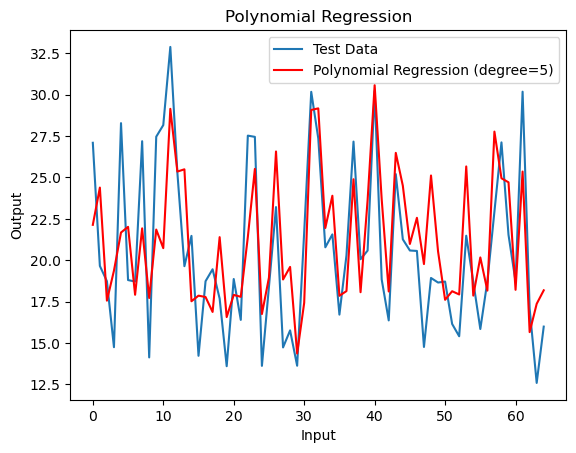

In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用多项式特征扩展训练集输入数据
degree = 5  # 多项式的阶数
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(train_whisker1_filtered1)

# 使用线性回归模型拟合扩展后的训练集数据
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_whiskergt1_filtered)

# 使用多项式特征扩展测试集输入数据
X_test_poly = poly_features.transform(test_whisker1_filtered1)

# 预测测试集输出数据
y_pred = lin_reg.predict(X_test_poly)

# 计算均方误差
mae = mean_absolute_error(test_whiskergt1_filtered, y_pred)
print("(MAE):", mae)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt1_filtered, label='Test Data')
plt.plot( y_pred, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

(MAE): 2.9729278283757203
(MSE): 11.906143158415523


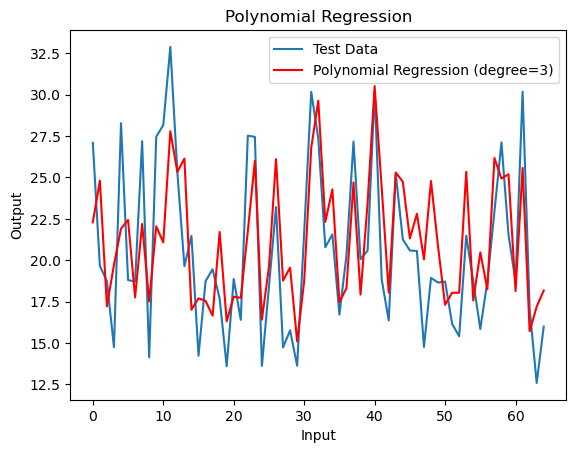

In [250]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用多项式特征扩展训练集输入数据
degree = 3  # 多项式的阶数
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(train_whisker1_filtered2)

# 使用线性回归模型拟合扩展后的训练集数据
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_whiskergt1_filtered)

# 使用多项式特征扩展测试集输入数据
X_test_poly = poly_features.transform(test_whisker1_filtered2)

# 预测测试集输出数据
y_pred = lin_reg.predict(X_test_poly)

# 计算均方误差
mae = mean_absolute_error(test_whiskergt1_filtered, y_pred)
print("(MAE):", mae)
mse = mean_squared_error(test_whiskergt1_filtered, y_pred)
print("(MSE):", mse)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt1_filtered, label='Test Data')
plt.plot( y_pred, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

(MAE): 2.188628320611083
(MSE): 7.13886400322908


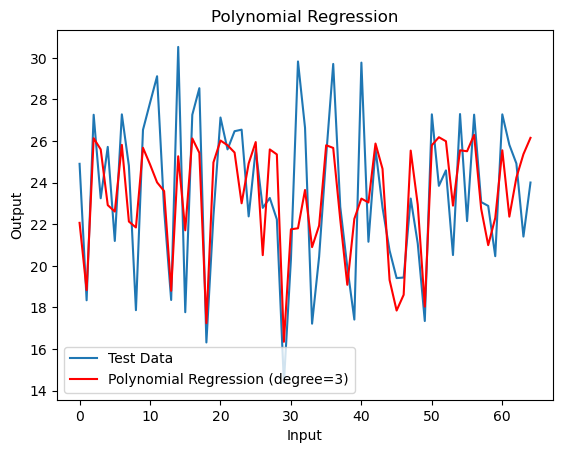

In [253]:

X_train_poly = poly_features.fit_transform(train_whisker2_filtered1)

# 使用线性回归模型拟合扩展后的训练集数据
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_whiskergt2_filtered)

# 使用多项式特征扩展测试集输入数据
X_test_poly = poly_features.transform(test_whisker2_filtered1)

# 预测测试集输出数据
y_pred = lin_reg.predict(X_test_poly)

# 计算均方误差
mae = mean_absolute_error(test_whiskergt2_filtered, y_pred)
print("(MAE):", mae)
mse = mean_squared_error(test_whiskergt2_filtered, y_pred)
print("(MSE):", mse)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt2_filtered, label='Test Data')
plt.plot( y_pred, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean Absolute Error (MAE): 2.88132084142314
Mean Squared Error (MAE): 10.819214639481912


c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 25.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\chaoxiangye\AppData\Local\Temp\ipykernel_3168\2754776729.py:7: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


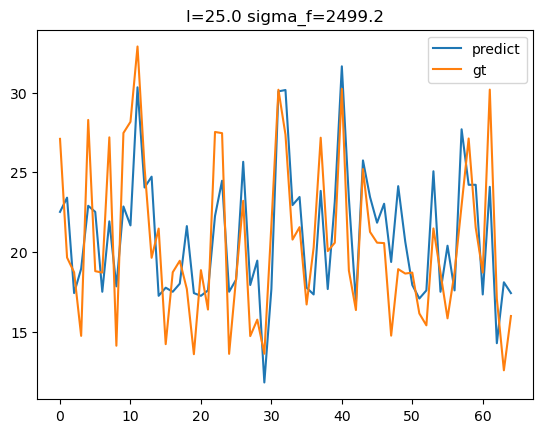

In [267]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=100, length_scale_bounds=(25, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50,normalize_y=True)
gpr.fit(train_whisker1_filtered1, train_whiskergt1_filtered)
mu, cov = gpr.predict(test_whisker1_filtered1, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
negative_indices = np.where(test_y < 0)[0]
over100_indices = np.where(test_y > 40)[0]

# 将小于0的异常值替换为前一个有效值
for i in negative_indices:
    test_y[i] = test_y[i - 1]

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = test_y[i - 1]

# plotting
# plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_y , label="predict")
plt.plot(test_whiskergt1_filtered, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")

plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y )
print("Mean Absolute Error (MAE):", mae)
mse=mean_squared_error(test_whiskergt1_filtered, test_y )
print("Mean Squared Error (MAE):", mse)

c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean Absolute Error (MAE): 3.2926679491624316


c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 25.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


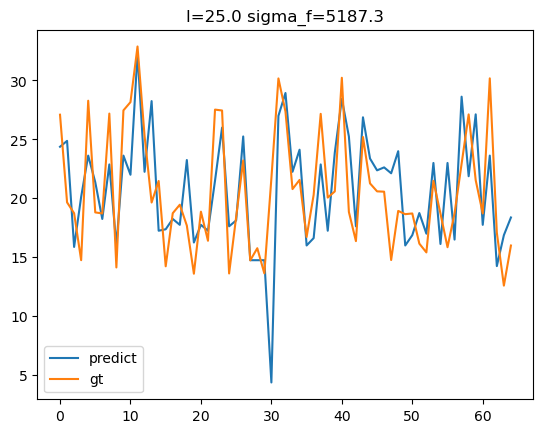

In [261]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=500, length_scale_bounds=(25, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)
gpr.fit(train_whisker1_filtered2, train_whiskergt1_filtered)
mu, cov = gpr.predict(test_whisker1_filtered2, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
negative_indices = np.where(test_y < 0)[0]
over100_indices = np.where(test_y > 40)[0]

# 将小于0的异常值替换为前一个有效值
for i in negative_indices:
    test_y[i] = test_y[i - 1]

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = test_y[i - 1]

# plotting
# plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_y , label="predict")
plt.plot(test_whiskergt1_filtered, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")

plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y )
print("Mean Absolute Error (MAE):", mae)

[[-3.999340594717747, -0.8866726923656536], [-1.7179141364743895, 3.8290562212176633], [-1.2217288683475518, -1.2673189888128942], [-2.3318959042301755, -1.046769128667397], [-2.3442401150740784, -2.94320686846493], [0.7677604346191451, 2.5811716407580896], [3.1714304138331393, -0.3526690536314483], [-3.2919234638866453, 2.329278428311275], [1.851523284397179, -3.6724243617886465], [-2.964745967212566, -0.43535216916126007], [2.649346966944808, -0.9547628672186645], [0.3347634010198526, 1.728953417142372], [0.5764469754473707, 2.093646060445028], [3.4916424437698614, 0.2142760918450941], [0.8294210707737353, -2.543620577636169], [-3.9793975750720483, 1.9725342687625176], [0.7204919001482297, 3.2852392348656103], [-0.43860694039472037, -2.814586276619199], [0.056912960475063556, -2.0771267801396247], [-0.15178944285514273, 1.7007391597881796], [-1.5161934281917846, -1.991934178017929], [-0.4400762472453206, 0.17931287405537155], [2.0776372627440294, 1.6080135803723428], [2.4943605605242

c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[7.67385656e-06 1.53477131e-05 1.43564710e-05 1.08524720e-05
            nan            nan 1.53477131e-05 9.39851646e-06
            nan 1.32915094e-05 1.71592649e-05 1.43564710e-05
            nan 1.71592649e-05 1.21334326e-05            nan
 1.53477131e-05 5.42623601e-06 2.36524144e-05 1.08524720e-05
 1.53477131e-05 7.67385656e-06 9.39851646e-06 0.00000000e+00
 1.71592649e-05 1.71592649e-05 1.79967889e-05 1.32915094e-05
 1.21334326e-05 2.30215697e-05 5.42623601e-06            nan
 9.39851646e-06 1.53477131e-05 0.00000000e+00 1.21334326e-05
 1.08524720e-05 0.00000000e+00 1.21334326e-05 1.43564710e-05
            nan            nan 9.39851646e-06 2.03031160e-05
 1.53477131e-05 1.62787080e-05 1.53477131e-05 1.08524720e-05
 1.08524720e-05 1.21334326e-05 1.08524720e-05 1.53477131e-05
 1.62787080e-05 7.67385656e-06 5.42623601e-06 9.39851646e-06
 2.65830189e-05            nan 1.53477131e-05 9.39851646e-06
            nan            nan            nan 7.67385656e-06
 9.39851646e-06]
Mean Ab

C:\Users\chaoxiangye\AppData\Local\Temp\ipykernel_3168\2389970153.py:7: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


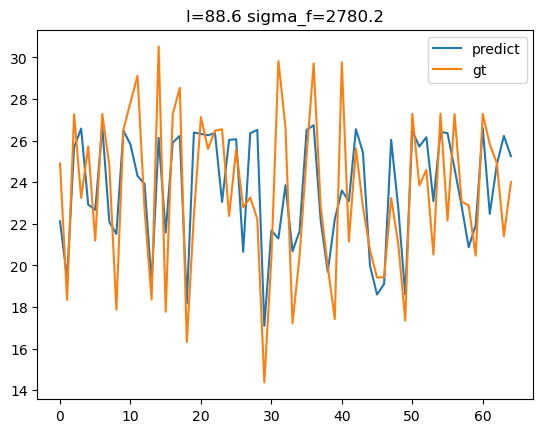

In [268]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=5000, length_scale_bounds=(50, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200,normalize_y=True)
gpr.fit(train_whisker2_filtered1, train_whiskergt2_filtered)
mu, cov = gpr.predict(test_whisker2_filtered1, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
negative_indices = np.where(test_y < 0)[0]
over100_indices = np.where(test_y > 40)[0]
print(uncertainty)
# 将小于0的异常值替换为前一个有效值
for i in negative_indices:
    test_y[i] = test_y[i - 1]

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = test_y[i - 1]
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
plt.fill_between(np.arange(len(test_y)), test_y + uncertainty, test_y - uncertainty, alpha=0.1)
plt.plot(test_y,label="predict")
plt.plot(test_whiskergt2_filtered,label="gt")
plt.legend()
mae = mean_absolute_error(test_whiskergt2_filtered, test_y )
print("Mean Absolute Error (MAE):", mae)
mse=mean_squared_error(test_whiskergt2_filtered, test_y )
print("Mean Squared Error (MAE):", mse)

In [132]:
from sklearn.preprocessing import StandardScaler
data3 = pd.read_csv('data1_new.csv')
whisker1_2_data3 = data3.iloc[:, 1].values
whisker2_2_data3 = data3.iloc[:, 4].values
whiskergt1_data3 = data3.iloc[:, 6].values
whiskergt2_data3 = data3.iloc[:, 7].values


# 划分训练集和测试集
train_whisker1, test_whisker1, train_whisker2, test_whisker2, train_whiskergt1, test_whiskergt1, train_whiskergt2, test_whiskergt2 = train_test_split(whisker1_2_data3, whisker2_2_data3, whiskergt1_data3, whiskergt2_data3, test_size=0.5, shuffle=True)

filter_indices_train = train_whisker1 >= 15
filter_indices_test = test_whisker1 >= 15

# 将符合条件的数据索引对应位置上的whisker和whiskergt数据保留
train_whisker1_filtered = train_whisker1[filter_indices_train]
train_whisker2_filtered = train_whisker2[filter_indices_train]
train_whiskergt1_filtered = train_whiskergt1[filter_indices_train]
train_whiskergt2_filtered = train_whiskergt2[filter_indices_train]

test_whisker1_filtered = test_whisker1[filter_indices_test]
test_whisker2_filtered = test_whisker2[filter_indices_test]
test_whiskergt1_filtered = test_whiskergt1[filter_indices_test]
test_whiskergt2_filtered = test_whiskergt2[filter_indices_test]

train_whisker1_filtered=train_whisker1_filtered.reshape(-1,1)
train_whisker2_filtered=train_whisker2_filtered.reshape(-1,1)
test_whisker1_filtered=test_whisker1_filtered.reshape(-1,1)
test_whisker2_filtered=test_whisker2_filtered.reshape(-1,1)



c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean Absolute Error (MAE): 7.861580599969545


c:\CX\CONDA\conda\envs\pytorchgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\chaoxiangye\AppData\Local\Temp\ipykernel_3168\104156798.py:7: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


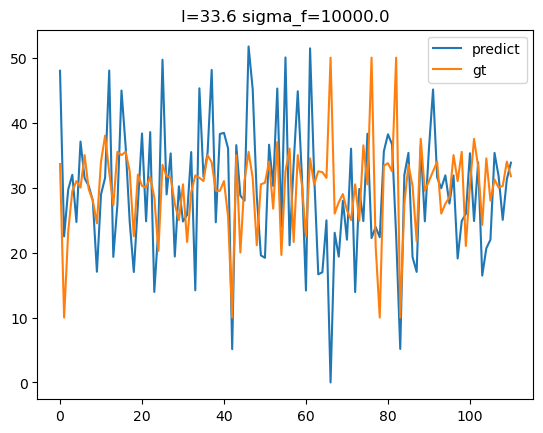

In [133]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(30, 1e4))
gpr3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200)
gpr3.fit(train_whisker1_filtered, train_whiskergt1_filtered)
mu, cov = gpr3.predict(test_whisker1_filtered, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

negative_indices = np.where(test_y < 10)[0]
over100_indices = np.where(test_y > 50)[0]
for i in negative_indices:
    test_y[i] = 50

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = 10
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr3.kernel_.k2.length_scale, gpr3.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_whiskergt1_filtered, label="predict")
plt.plot(test_y, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")
plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y)
print("Mean Absolute Error (MAE):", mae)

In [256]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(10, 1e4)) * RBF(length_scale=10, length_scale_bounds=(10000, 1e4))
gpr3 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200)
gpr3.fit(train_whisker1_filtered, train_whiskergt1_filtered)
mu, cov = gpr3.predict(test_whisker1_filtered, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

negative_indices = np.where(test_y < 0)[0]
over100_indices = np.where(test_y > 50)[0]
for i in negative_indices:
    test_y[i] = 50

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    test_y[i] = 0
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr3.kernel_.k2.length_scale, gpr3.kernel_.k1.constant_value))
# plt.fill_between(test_whisker1.ravel(), test_whiskergt1 + uncertainty, test_whiskergt1 - uncertainty, alpha=0.1)
plt.plot(test_whiskergt1_filtered, label="predict")
plt.plot(test_y, label="gt")
# plt.scatter(train_whisker1, train_whiskergt1, label="train", c="red", marker="x")
plt.legend()
mae = mean_absolute_error(test_whiskergt1_filtered, test_y)
print("Mean Absolute Error (MAE):", mae)

ValueError: Expected 2D array, got 1D array instead:
array=[18.16272158 42.85017177 32.41998355 37.64429559 33.55384137 16.79029622
 25.12904606 17.88038932 19.35456742 32.92682313 21.06673124 37.2692139
 35.29107062 18.41438241 24.81110112 37.23936018 36.67398715 24.40209663
 23.4370283  31.11783682 24.20318074 36.70923612 13.21021896 30.86763805
 20.66620616 28.93000918 35.34470223 24.11228606 20.87500254 26.92029388
 18.00580246 20.67955654 19.34086403 20.36716185 15.82670108 22.74607961
 35.10337245 25.53371072 33.22107839 33.51363708 31.38500398 32.47836618
 17.05915979 15.72824925 16.70715725 35.29767891 24.69809087 31.66019975
 21.51817059 31.62351832 29.1787535  28.87808811 38.75237728 13.91735592
 34.82303779 26.99966073 36.02642214 38.08541539 21.52457939 17.71144969
 17.85565405 28.57650477 34.43737933 22.70313736 33.26043895 29.45762924
 39.45602137 37.26785958 40.92205454 20.65924638 35.4400254  11.73974686
 23.77432598 34.74348581 20.76305669 23.21450587 11.16788362 31.4964725
 21.91169177 18.30890668 31.86827764 32.28909707 32.65859239 31.18875859
 21.36884757 22.11302929 34.27128823 24.77428881 31.72010867 34.29973392
 33.39381154 24.74522324 22.49527627 19.03567224 22.24546621 20.69682641
 16.52400611 35.3935531  16.43345304 26.75818512 26.50795157 19.87020771
 13.74322777 19.76477945 38.74316751 34.10300872 22.49580938 22.44649232
 33.69990555 35.10876776 32.01225801 24.69369574 11.23500992 36.09361499
 42.98704271 29.08498877 22.37836439 38.10860121 41.9832198  34.69166876
 25.00517521 16.06543665 15.38735022 25.07074927 24.42981764 13.11692423
 37.57597084 35.25329749 17.91701911 27.71083626 15.33675698 36.42960796
 35.83784227 37.98817405 23.51721756 21.864497   25.01501557 25.31689121
 23.79796513 26.4380863  21.79193292 27.18691624 18.12980756 12.29182346
 23.89584227 26.13152505 26.12581185 25.50145024 33.09469333 39.97255145
 25.67173323 17.29384475 23.11591219 31.8675861  28.60564663 31.33192588
 23.78607773 13.27723724 18.67878453 17.92536219 19.07640356 32.62900256
 28.61250753 32.74856285 25.68077496 35.82716267 28.87201595 36.19322165
 29.18530231 34.51426985 40.76529501 23.44207996 33.24554646 22.55596599
 16.31660688 18.55560044 25.85361478 38.0774968  34.97766485 31.45445611
 34.55307528 23.58259805 25.57938682 35.67668328 19.24094217 33.67902853
 40.39633034 25.56621401 33.47580012 23.08764163 23.86031894 34.7342839
 37.21066109 27.28081675 10.36132258 39.20806218 22.92523384 38.69847368
 34.17354009 28.01860448 34.51402545 37.21616026 31.92270614 35.33792985
 21.30819211 33.02618342 26.14639845 32.82587673 11.79070958 30.53110057
 16.33585062 21.89003402 33.89389596 28.48586975 27.93090061].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

(MAE): 7.552106847137807


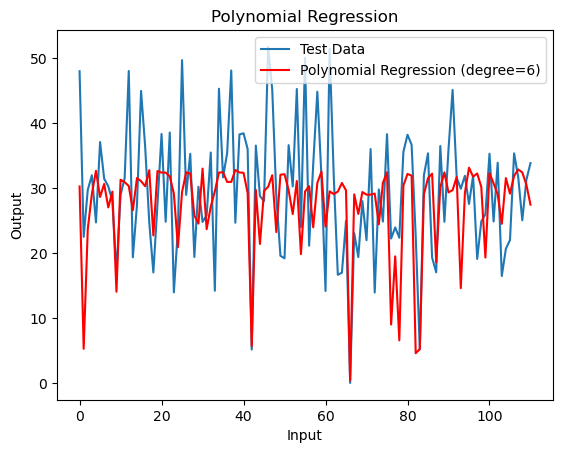

In [140]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用多项式特征扩展训练集输入数据
degree = 6 # 多项式的阶数
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(train_whisker1_filtered)

# 使用线性回归模型拟合扩展后的训练集数据
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_whiskergt1_filtered)

# 使用多项式特征扩展测试集输入数据
X_test_poly = poly_features.transform(test_whisker1_filtered)

# 预测测试集输出数据
y_pred = lin_reg.predict(X_test_poly)

# 计算均方误差
mae = mean_absolute_error(test_whiskergt1_filtered, y_pred)
print("(MAE):", mae)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt1_filtered, label='Test Data')
plt.plot( y_pred, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

(MAE): 7.18072515215742


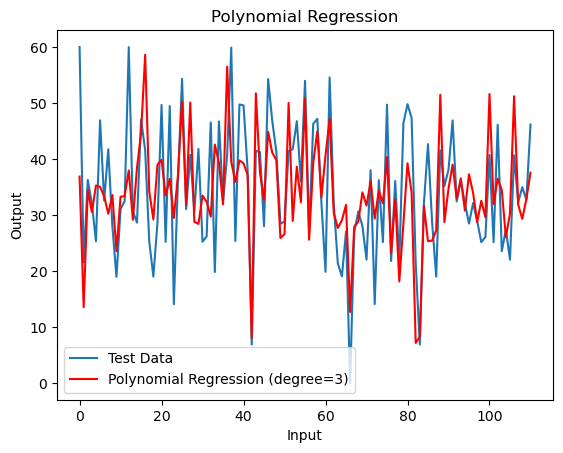

In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用多项式特征扩展训练集输入数据
degree = 3 # 多项式的阶数
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(train_whisker2_filtered)

# 使用线性回归模型拟合扩展后的训练集数据
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, train_whiskergt2_filtered)

# 使用多项式特征扩展测试集输入数据
X_test_poly = poly_features.transform(test_whisker2_filtered)

# 预测测试集输出数据
y_pred = lin_reg.predict(X_test_poly)
negative_indices = np.where(y_pred < 0)[0]
over100_indices = np.where(y_pred > 100)[0]
for i in negative_indices:
    y_pred[i] = y_pred[i - 1]

# 将大于100的异常值替换为前一个有效值
for i in over100_indices:
    y_pred[i] = y_pred[i - 1]
# 计算均方误差
mae = mean_absolute_error(test_whiskergt2_filtered, y_pred)
print("(MAE):", mae)

# 绘制拟合曲线和测试集数据
plt.plot( test_whiskergt2_filtered, label='Test Data')
plt.plot( y_pred, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 2.674371742799022e-12


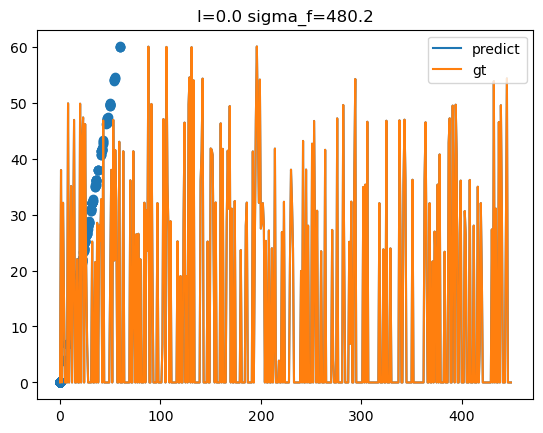

In [110]:
# fit GPR
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(1e-4, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
gpr.fit(train_whisker2, train_whiskergt2)
mu, cov = gpr.predict(train_whisker2, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
# plt.fill_between(test_whisker2.ravel(), test_whiskergt2 + uncertainty, test_whiskergt2 - uncertainty, alpha=0.1)
plt.plot(test_y,label="predict")
plt.plot(train_whiskergt2,label="gt")
plt.scatter(test_y,train_whiskergt2)
plt.legend()
mae = mean_absolute_error(train_whiskergt2, test_y)
print("Mean Absolute Error (MAE):", mae)